In [2]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import numpy as np

In [4]:
import pandas as pd
train = pd.read_parquet('/kaggle/input/wsdm-cup-multilingual-chatbot-arena/train.parquet')

In [5]:
train.columns

Index(['id', 'prompt', 'response_a', 'response_b', 'winner', 'model_a',
       'model_b', 'language'],
      dtype='object')

# data overview

In [4]:
# Data Overview
print(train.info())
print(train.describe())
print("Missing values per column:\n", train.isnull().sum())
print("Unique languages:", train['language'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48439 entries, 0 to 48438
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          48439 non-null  object
 1   prompt      48439 non-null  object
 2   response_a  48439 non-null  object
 3   response_b  48439 non-null  object
 4   winner      48439 non-null  object
 5   model_a     48439 non-null  object
 6   model_b     48439 non-null  object
 7   language    48439 non-null  object
dtypes: object(8)
memory usage: 3.0+ MB
None
                                                       id  \
count                                               48439   
unique                                              48439   
top     ffff059aea247f1dc7a09cfea55e00309b5b9a2e8cd9fc...   
freq                                                    1   

                                                   prompt  \
count                                               48439   
unique             

All columns details :

id: Unique identifier for each conversation.

prompt: The user's input or question.

response_a: First chatbot-generated response.

response_b: Second chatbot-generated response.

winner: The preferred response as selected by the user.

model_a: The name of the chatbot model that generated response_a.

model_b: The name of the chatbot model that generated response_b.

language: The language in which the conversation took place.




Other information regarding dataset:

Shape: (48,439, 8)

Number of Unique Prompts: 44,418

Number of Unique Responses: Response A: 48,318 , Response B: 48,324

Most Common Model: chatgpt-4o-latest-20240903

Total Unique Models: 60

Total Unique Languages: 128

# language distribution 

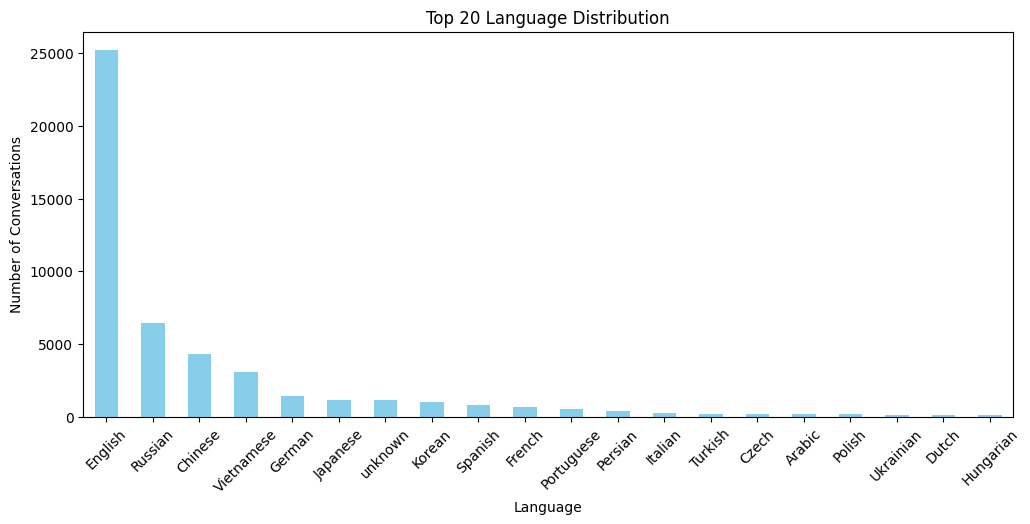

In [7]:
# 1. Language Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
train["language"].value_counts().head(20).plot(kind="bar", color="skyblue")
plt.title("Top 20 Language Distribution")
plt.xlabel("Language")
plt.ylabel("Number of Conversations")
plt.xticks(rotation=45)
plt.show()

Observations:

English conversations account for the vast majority, suggesting a strong bias in the dataset.

Russian and Chinese form the second and third largest language groups, but they are significantly smaller in proportion.

Languages such as Vietnamese, German, and Japanese have moderate representation, while Italian, Arabic, and Dutch are sparsely present.

The presence of an "unknown" category raises concerns about proper language detection and possible misclassification in the dataset.

The dataset appears highly imbalanced, indicating a need for resampling techniques, weighted training, or data augmentation for underrepresented languages.


# 2. Word Frequency Analysis per Language

In [11]:
nltk.download("punkt")

def get_most_common_words(text_series, n=10):
    words = []
    for text in text_series.dropna():
        words.extend(word_tokenize(text.lower()))
    return Counter(words).most_common(n)

# Example: Get the most common words in English conversations
english_df = train[train["language"] == "English"]
common_words_english = get_most_common_words(pd.concat([english_df["response_a"], english_df["response_b"]]))
print("Most common words in English responses:", common_words_english)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Most common words in English responses: [(',', 979804), ('.', 901197), ('the', 816438), (':', 545518), ('and', 472712), ('a', 407642), ('to', 369021), (')', 362934), ('(', 357860), ('of', 350618)]


In [13]:
nltk.download("punkt")

def get_most_common_words(text_series, n=10):
    words = []
    for text in text_series.dropna():
        words.extend(word_tokenize(text.lower()))
    return Counter(words).most_common(n)

# Example: Get the most common words in English conversations
english_df = train[train["language"] == "Chinese"]
common_words_english = get_most_common_words(pd.concat([english_df["response_a"], english_df["response_b"]]))
print("Most common words in Chinese responses:", common_words_english)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Most common words in Chinese responses: [('.', 37764), (')', 35840), ('(', 35578), (',', 35017), ('#', 34456), ('-', 33640), (':', 27842), ('*', 19205), ('**', 17118), ('=', 15842)]


In [14]:
nltk.download("punkt")

def get_most_common_words(text_series, n=10):
    words = []
    for text in text_series.dropna():
        words.extend(word_tokenize(text.lower()))
    return Counter(words).most_common(n)

# Example: Get the most common words in English conversations
english_df = train[train["language"] == "Russian"]
common_words_english = get_most_common_words(pd.concat([english_df["response_a"], english_df["response_b"]]))
print("Most common words in Russian responses:", common_words_english)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Most common words in Russian responses: [(',', 256900), ('.', 200587), ('и', 107490), (':', 106690), ('в', 68707), (')', 64692), ('(', 62990), ('-', 56378), ('**', 48664), ('#', 43597)]


Observations:

Punctuation marks dominate all languages, suggesting they are not preprocessed or heavily used in conversations.

English contains common function words like "the," "and," "a," "to," and "of," which are expected in natural language.

Russian contains frequent conjunctions and prepositions, such as "и" (and) and "в" (in), which are common in sentence construction.

Chinese responses contain more symbolic characters (#, *, **, =), indicating that special characters and formatting may play a role in Chinese text processing.

The frequency of parentheses and special symbols in Russian and Chinese suggests a need for proper tokenization and preprocessing before model training.

The high occurrence of punctuation and symbols may require filtering to improve text clarity and reduce noise in NLP models.

#  3. Response Length Comparison Across Languages

In [16]:
# 3. Response Length Comparison Across Languages
train["response_a_length"] = train["response_a"].apply(lambda x: len(str(x).split()))
train["response_b_length"] = train["response_b"].apply(lambda x: len(str(x).split()))

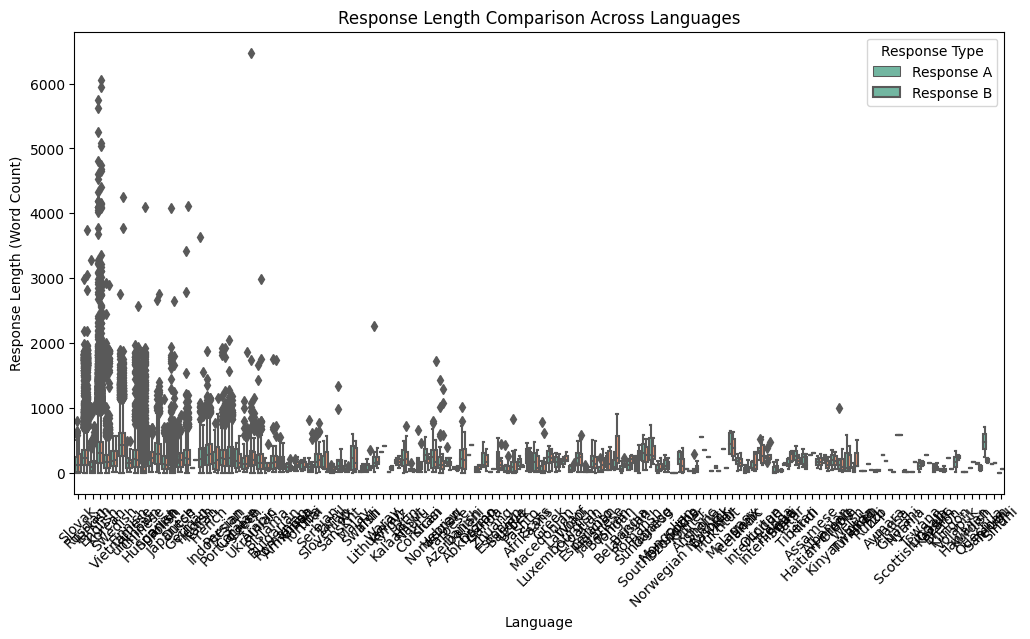

In [17]:
# Melt the DataFrame to make it suitable for Seaborn
df_melted = train.melt(id_vars=["language"], value_vars=["response_a_length", "response_b_length"], 
                     var_name="Response", value_name="Length")

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x="language", y="Length", hue="Response", data=df_melted, palette="Set2")

# Customize plot
plt.xlabel("Language")
plt.ylabel("Response Length (Word Count)")
plt.title("Response Length Comparison Across Languages")
plt.xticks(rotation=45)
plt.legend(title="Response Type", labels=["Response A", "Response B"])

# Show the plot
plt.show()

observations :

 so there are 121 languages which makes it very difficult to get an rough idea

# Plot response length distribution for top languages

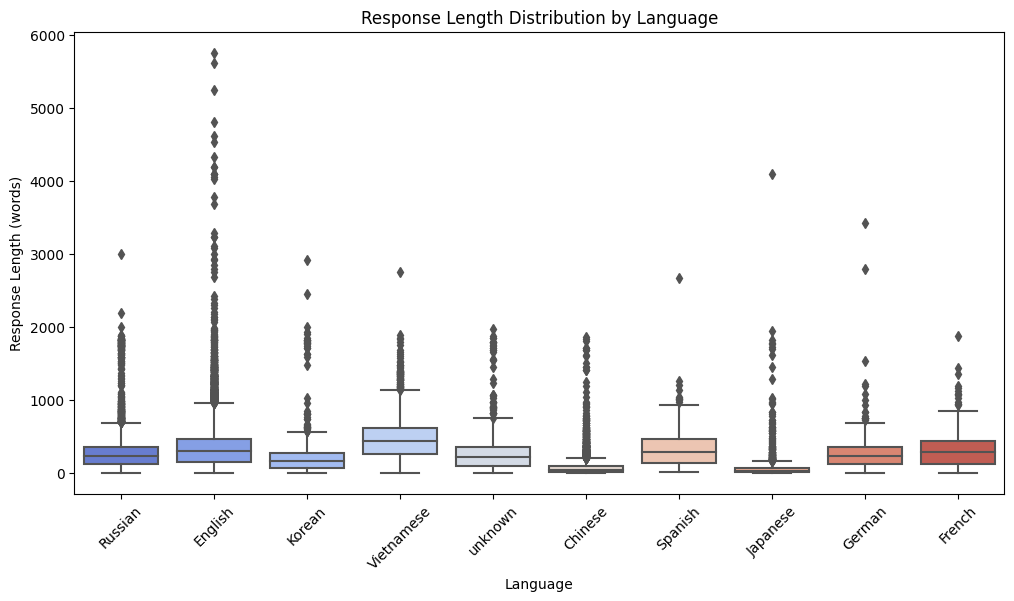

In [19]:

top_languages = train["language"].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=train[train["language"].isin(top_languages)], x="language", y="response_a_length", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Response Length Distribution by Language")
plt.xlabel("Language")
plt.ylabel("Response Length (words)")
plt.show()

Observations:

English and Russian responses tend to be longer on average than other languages.

Significant outliers are present across all languages, indicating some extremely long responses in the dataset.

Asian languages (e.g., Chinese, Japanese, Korean) have shorter median response lengths, possibly due to character-based writing systems.

The unknown category also shows variation, suggesting that it may contain multiple languages or inconsistent preprocessing.

The dataset contains a high variance in response length, meaning the model should account for both short and long-form conversations.

 # Bar Chart: Language Distribution

/tmp/ipykernel_13/1165560796.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="language", data=train, palette="pastel", order=train["language"].value_counts().index)


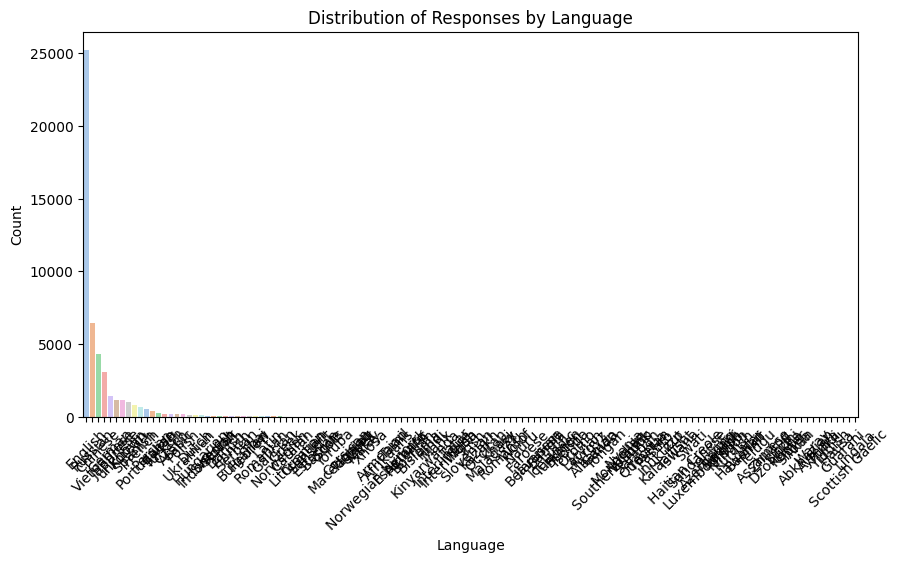

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count responses per language
plt.figure(figsize=(10, 5))
sns.countplot(x="language", data=train, palette="pastel", order=train["language"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Distribution of Responses by Language")
plt.show()


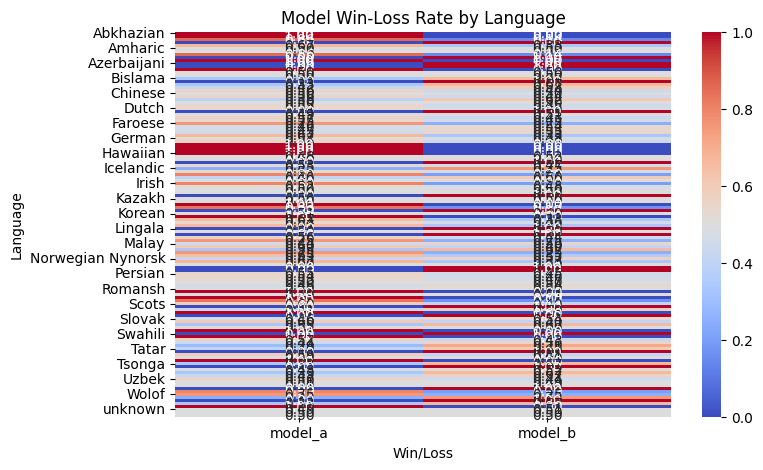

In [9]:
import numpy as np

# Compute win rates per language
win_loss_matrix = train.pivot_table(index="language", columns="winner", aggfunc="size", fill_value=0)

# Normalize win rates
win_loss_matrix = win_loss_matrix.div(win_loss_matrix.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(win_loss_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.xlabel("Win/Loss")
plt.ylabel("Language")
plt.title("Model Win-Loss Rate by Language")
plt.show()


Observation:

The heatmap illustrates the win-loss rates of two chatbot models across various languages. Red indicates a high win rate, while blue represents a low win rate. Some languages show a clear dominance by one model, while others exhibit a more balanced performance. The clustering of colors suggests that certain languages may favor one model over the other, potentially due to differences in training data, language proficiency, or contextual understanding. The presence of highly mixed regions also indicates inconsistency in performance across languages.

In [15]:
!pip install umap


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [16]:
train.columns

Index(['id', 'prompt', 'response_a', 'response_b', 'winner', 'model_a',
       'model_b', 'language', 'jaccard_similarity', 'cosine_similarity',
       'combined_response'],
      dtype='object')

In [18]:
pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Comparing Chatbot Response Clustering using t-SNE and UMAP

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


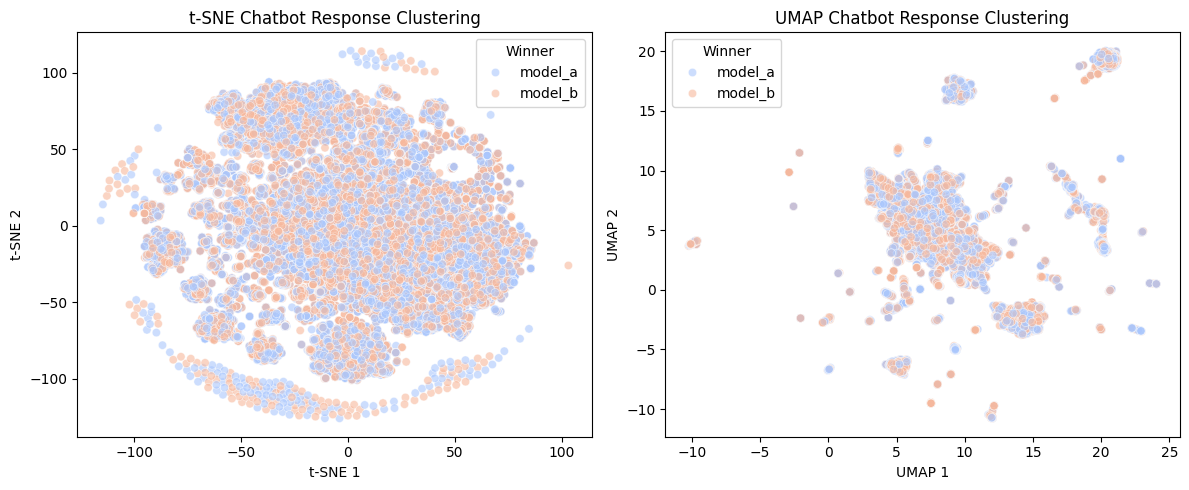

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
#import umap
import umap.umap_ as umap

# Combine response_a and response_b into a single text column
train["combined_response"] = train["response_a"] + " " + train["response_b"]

# Convert responses to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(train["combined_response"])

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Reduce dimensions using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X.toarray())

# Define a color mapping based on the winner column
train["winner_label"] = train["winner"].astype(str)  # Ensure categorical coloring

# Plot t-SNE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=train["winner_label"], palette="coolwarm", alpha=0.6)
plt.title("t-SNE Chatbot Response Clustering")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Winner")

# Plot UMAP
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=train["winner_label"], palette="coolwarm", alpha=0.6)
plt.title("UMAP Chatbot Response Clustering")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Winner")

plt.tight_layout()
plt.show()


1. t-SNE Clustering (Left Plot)

   
The points are densely packed and form complex structures, including circular and elongated clusters.

There is significant overlap between responses from model_a (blue) and model_b (orange), indicating that both models generate responses with similar feature distributions.

Some outliers are present, which may indicate unique response patterns from one model.




3. UMAP Clustering (Right Plot)
   
The clusters are more distinct and loosely spread, highlighting key differences between chatbot responses.

Unlike t-SNE, UMAP appears to form tighter clusters, suggesting that it captures global structures more effectively.

Some isolated points suggest unique responses that differ significantly from the main clusters.